Using exhaustive search and then using interval halving method, the critical value of aplha receieved in the given direction is 1.0172413885593414
The value of w1 and w2 for which we get minimum value for function in the given direction is 5.051724165678024 and 12.12068971991539 and the value of J at that point is 28.98275862068966.
The dot product of direction vector and partial derivative vector is -118
Search direction is a gradient descent


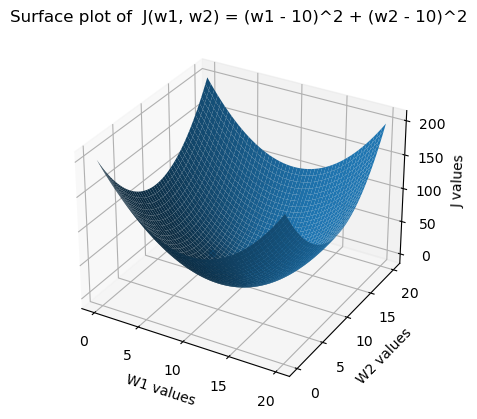

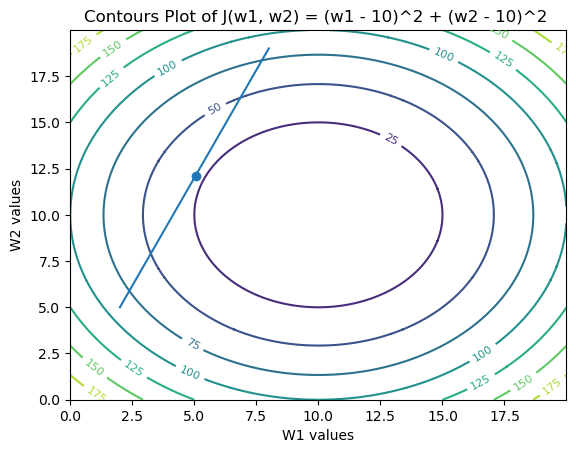

In [6]:
#Lab8 Part 1
import numpy as np
import matplotlib.pyplot as pl
def J(w1,w2):
        j = (w1-10)**2 + (w2-10)**2
        return j
#Optimization (multi variable)
#
w_s = (2,5)
s = (3,7)
def u_s(a):
    w1 = w_s[0] + a*s[0]
    w2 = w_s[1] + a*s[1]
    j1 = J(w1,w2)
    return j1
def critical(a,b,n):
    print("Using exhaustive search and then", end = ' ')
    delta  = (b-a)/n
    a1 = a
    a2 = a1+delta
    a3 = a2+delta
    while a3<=b:
        if u_s(a1)>=u_s(a2)<=u_s(a3):
            tup1 = (a1,a3)
            return tup1
        else:
            a1 = a2
            a2 = a3
            a3 = a3 + delta
# Interval Halving method
def interval_halving(a,b,E):
    L = b-a
    a_m = (a+b)/2
    while abs(L)>=E:
        Ja = u_s(a_m)
        a1 = a+L/4
        a2 = b-L/4
        Ja1 = u_s(a1)
        Ja2 = u_s(a2)
        if Ja1 < Ja:
            b = a_m
            a_m = a1
        elif Ja2 < Ja:
            a = a_m
            a_m = a2
        else:
            b = a2
            a = a1
            a_m = (a+b)/2
        L = b-a
    tup_3 = (a,b)
    return (tup_3[0]+tup_3[1])/2
a = 0
b = 5
n = 10
E = 0.00000000001
range_1 = critical(a,b,n)
cric_alpha = interval_halving(range_1[0],range_1[1],E)
print("using interval halving method, the critical value of aplha receieved in the given direction is",cric_alpha)
w_1 = w_s[0] + cric_alpha*s[0]
w_2 = w_s[1] + cric_alpha*s[1] 
value = J(w_1,w_2)
print(f"The value of w1 and w2 for which we get minimum value for function in the given direction is {w_1} and {w_2} and the value of J at that point is {value}.")
w1 = np.arange(0,20,0.01)
w2 = np.arange(0,20,0.01)
W1,W2 = np.meshgrid(w1,w2)
j2 = J(W1,W2)
fig = pl.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.plot_surface(W1,W2,j2)
ax.scatter(w_1,w_2)
ax.set_title("Surface plot of  J(w1, w2) = (w1 - 10)^2 + (w2 - 10)^2")
ax.set_xlabel('W1 values')
ax.set_ylabel('W2 values')
ax.set_zlabel('J values')
fig2,ax2=pl.subplots(1,1)
cp  = pl.contour(W1,W2,j2)
pl.scatter(w_1,w_2)
pl.clabel(cp, fontsize=8)
ax2.set_title('Contours Plot of J(w1, w2) = (w1 - 10)^2 + (w2 - 10)^2 ')
ax2.set_xlabel('W1 values')
ax2.set_ylabel('W2 values')
w__1 = w_s[0] + 2*s[0]
w__2 = w_s[1] + 2*s[1] 
x = [w_s[0],w__1]
y = [w_s[1],w__2]
pl.plot(x,y)
s_vec = np.array(s)
del_j = np.array([2*(w_s[0]-10),2*(w_s[1]-10)]) # gradient of j at (w1,w2) = (2(w1-10),2(w2-5))
print("The dot product of direction vector and partial derivative vector is",np.dot(s_vec,del_j))
if np.dot(s_vec,del_j) < 0:
    print("Search direction is a gradient descent")
elif np.dot(s_vec,del_j) > 0:
    print("Search direction is a gradient ascent")
else:
    print("Search direction is the direction same as grad(j) direction.")
pl.show()
